In [36]:
from scipy.stats import norm
from scipy.optimize import fsolve
print("p = ", norm.cdf(6, 3, 5) - norm.cdf(2, 3, 5))
f = lambda c: norm.cdf(2*c, 3, 5) - norm.cdf(-3*c, 3, 5) - 0.6
print("c = ", fsolve(f, 0))

p =  0.3050065916890295
c =  [2.29103356]


上alpha分位数分别为 [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_860/163449538.py:14: SyntaxWarning: invalid escape sequence '\$'
  text(1.9, 0.07, "\\leftarrow\\alpha\$=0.1")


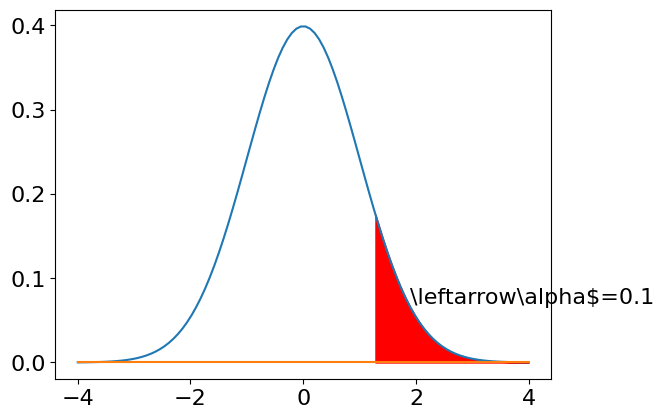

In [37]:
from scipy.stats import norm
from pylab import plot, fill_between, show, text, savefig, rc
from numpy import array, linspace, zeros
alpha = array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])
za = norm.ppf(1-alpha, 0, 1)    # 求上$\alpha$分位数
print("上alpha分位数分别为", za)
x = linspace(-4, 4, 100); y = norm.pdf(x, 0, 1)
rc('font', size = 16)#; #rc('text', usetex = True)
plot(x, y)
x2 = linspace(za[-1], 4, 100); y2 = norm.pdf(x2)
y1 = [0] * len(x2)
fill_between(x2, y1, y2, color = 'r')   # y1, y2之间填充
plot([-4, 4], [0, 0])
text(1.9, 0.07, "\\leftarrow\\alpha\$=0.1")
# savefig("figure4_2.png", dpi = 500)
show()

In [38]:
from scipy.stats import binom
n, p = 20, 0.8
print("期望和方差分布为: ", binom.stats(n, p))

期望和方差分布为:  (np.float64(16.0), np.float64(3.1999999999999975))


In [39]:
from scipy.stats import binom
n, p = 20,  0.8
mean, variance, skewness, kurtosis = binom.stats(n, p, moments='mvsk')
print("所求的数字特征: ", binom.stats(n, p, moments = 'mvsk'))

所求的数字特征:  (np.float64(16.0), np.float64(3.1999999999999975), np.float64(-0.3354101966249686), np.float64(0.012500000000000178))


In [40]:
from numpy import reshape, hstack, mean, median, ptp, var, std, cov, corrcoef
import pandas as pd
df = pd.read_excel("Pdata4_6_1.xlsx", header = None)
a = df.values
h = a[:, ::2]
w = a[:, 1::2]
h = reshape(h, (-1, 1))
w = reshape(w, (-1, 1))
hw = hstack([h, w])
print([mean(h), median(h), ptp(h), var(h), std(h)])
# 计算均值,中位数,极差,方差,标准差
print("协方差为:{}\n相差系数为:{}".format(cov(hw.T)[0,1], corrcoef(hw.T)[0,1]))

FileNotFoundError: [Errno 2] No such file or directory: 'Pdata4_6_1.xlsx'

In [ ]:
from numpy import reshape, c_
import pandas as pd
df = pd.read_excel("Pdata4_6_1.xlsx", header = None)
a = df.values; h1 = a[:, ::2]; w1 = a[:, 1::2]
h2 = reshape(h1, (-1, 1))
w2 = reshape(w1, (-1, 1))
df2 = pd.DataFrame(c_[h2, w2], columns = ["身高","体重"]) # 构造数据框
print("求得的描述统计量如下: \n", df2.describe())
print("偏度为: \n", df2.skew())
print("峰度为: \n", df2.kurt())
print("分位数为: \n", df.quantile(0.9))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.loadtxt("Pdata4_9.txt")
b = a.T # 转置成两列的数据

plt.rc('font', size = 16)
plt.rc('font', family = 'SimHei')
plt.boxplot(b, labels = ['女子', '男子'])

plt.savefig('figure4_9.png', dpi = 500)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.loadtxt("Pdata4_6.txt")
h = a[:, ::2]
w = a[:, 1::2]
h = np.reshape(h, (-1, 1))
w = np.reshape(w, (-1, 1))
hw = np.hstack(h, w)        # 组合

plt.rc('font', size = 16)
plt.rc('font', family = 'SimHei')
plt.boxplot(hw, labels = ["身高", "体重"])

plt.savefig("figure4_10.png", dpi = 500)
plt.show()

In [ ]:
# 程序文件4_15.py
import numpy as np
from statsmodels.stats.weightstats import ztest
sigma = 0.015
a = np.array([0.497, 0.0506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])
tstat1, pvalue = ztest(a, value = 0.5)   # 计算T统计量的观测值和p值
tstat2 = tstat1 * a.std(ddof=1) / sigma
print('t值为: ', round(tstat1, 4))
print('z值为: ', round(tstat2, 4))
print('p值为: ', round(pvalue, 4))

t值为:  -0.7669
z值为:  -7.8756
p值为:  0.4431


In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest
a = np.array([3.25, 3.27, 3.24, 3.26, 3.24])
tstat, pvalue = ztest(a, value = 3.25)
print('检验统计量为: ', tstat)
print('p值为: ', pvalue)

检验统计量为:  0.34299717028498317
p值为:  0.7316005889599273


In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest
a = np.array([16, 25, 21, 20, 23, 21, 19, 15, 13, 23, 17, 20, 29, 18, 22, 16, 22])
tstat, pvalue = ztest(a, value = 21, alternative = 'smaller')
print('检验统计量为: ', tstat)
print('p值为', pvalue)

检验统计量为:  -1.0348266239966402
p值为 0.15037494342517732


In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
a = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
b = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 
              0.220, 0.201])
tstat, pvalue, df = ttest_ind(a, b, value = 0, usevar = 'pooled')
print('检验统计量：', tstat)
print('p值为：', pvalue)
print('自由度为：', df)

检验统计量： 3.7035535443338206
p值为： 0.003156058892529494
自由度为： 11.671039115678873


In [ ]:
import numpy as np
from scipy.stats import norm

a = np.loadtxt("Pdata4_6_2.txt")
h = a[:, ::2]
h = h.flatten()
mu = np.mean(h)
s = np.std(h)

print("样本均值和标准差: ", [mu, s])
print("极大似然估计值：", norm.fit(h))

In [ ]:
from numpy import array, sqrt
from scipy.stats import t

a = array([506, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506,
           502, 509, 496])
mu = a.mean()
s = a.std(ddof = 1)
print(mu, s)
alpha = 0.05
n = len(a)

val = (mu-s/sqrt(n)*t.ppf(1-alpha/2, n-1), mu+s/sqrt(n)*t.ppf(1-alpha/2, n-1))
print("置信区间： ", val)

503.75 6.202150164795002
置信区间：  (np.float64(500.44510746243924), np.float64(507.05489253756076))


In [ ]:
import numpy as np
import scipy.stats as ss
# from scipy import stats

a = np.array([506, 508, 499, 503, 504, 510, 497, 512, 514, 505, 493, 496, 506,
           502, 509, 496])
alpha = 0.95
df = len(a) - 1
ci = ss.t.interval(alpha, df, loc = a.mean(), scale = ss.sem(a))

print("置信区间为： ", ci)


置信区间为：  (np.float64(500.44510746243924), np.float64(507.05489253756076))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

n = 50; k = 8
a = np.loadtxt("Pdata4_20.txt")
a = a.flatten()
mu = a.mean()
s = a.std()
print("均值为: ", mu)
print("标准差为: ", s)
print("最大值为: ", a.max())
print("最小值为: ", a.min())

bins = np.array([14.2, 14.625, 14.8375, 15.05, 15.2625, 15.475, 15.9])# np.linspace(14.2, 15.9, 7)
h = plt.hist(a, bins) #H?
f = h[0]; x = h[0]  # 提取各个小区间的频数，和小区间端点的取值
dp = np.diff(p)     # 计算各个小区间取值的理论概率(p?)
dp[0] = ss.norm.cdf(x[1], mu, s)
dp[-1] = 1 - ss.norm.cdf(x[-2], mu, s)
print("各个小区间的理论概率为: ", dp)
cha = (n2 - n*dp)**2/(n*dp)     # 应该是f吧，哪来的n2
st = cha.sum()    # 计算卡方统计量的观察值
bd = ss.chi2.pdf(0.95, k-5) # 计算上α分位数and软编码k-5

print("统计量为: {}, 临界值为: {}".format(st, bd))

In [ ]:
import pandas as pd

a = pd.read_excel("Pdata4_26_1.xlsx", index_col = None)
# print(a)
# a = a.drop(a.columns[0], axis = 1)
# print('\n',a)
print("是否存在重复观测: ", any(a.duplicated()))

a.drop_duplicates(inplace = True)     # inplace = True时，直接删除a中的重复数据
f = pd.ExcelWriter('Pdata4_26_2.xlsx')  # 创建文件对象
a.to_excel(f)                           # 把a写入新的excel文件中
f.close()


是否存在重复观测:  True


In [41]:
from pandas import read_excel
a = read_excel("Pdata2_33.xlsx", usecols = range(1, 4))
b1 = a.dropna()                     # 删除所有缺失值
b2 = a.dropna(axis = 1, thresh = 9) # 删除有效数据少于9的列
b3 = a.drop('用户B', axis = 1)      # 删除用户b的数据
print(b1, '\n-----------\n', b2, '\n-----------\n', b3)

      用户A     用户B      用户C
0  235.83  324.03  473.320
1  236.27  325.63  515.450
2  238.05  328.08  517.090
6  237.41  391.26  516.230
8  237.61  388.02  435.350
9  238.03  206.43  487.675 
-----------
       用户A     用户B
0  235.83  324.03
1  236.27  325.63
2  238.05  328.08
3  235.90     NaN
4  236.76  268.82
5     NaN  404.04
6  237.41  391.26
7  238.65  380.81
8  237.61  388.02
9  238.03  206.43 
-----------
       用户A      用户C
0  235.83  473.320
1  236.27  515.450
2  238.05  517.090
3  235.90  514.890
4  236.76      NaN
5     NaN  486.090
6  237.41  516.230
7  238.65      NaN
8  237.61  435.350
9  238.03  487.675


In [44]:
from pandas import read_excel
a = read_excel("Pdata4_29.xlsx")
b1 = a.fillna(0)                    # 用0填补所有缺失值
b2 = a.fillna(method = 'ffill')     # 用前一行的值填补缺失值 # future
b3 = a.fillna(method = 'bfill')     # 用后一行的值填补缺失值 # 更新换为bfill(),ffill()
b4 = a.fillna(value = {'gender': a.gender.mode()[0],  # 性别用众数替换
                      'age' : a.age.mean(),           # 年龄用均值替换
                      'income' : a.income.median()})  # 收入用中位数替换
print(a, '\n------\n', b1, '\n----------\n', b2, '\n----------\n', b3, '\n----------\n', b4)

        uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F   NaN  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21    NaN   NaN   4500.0
5  72399510 2016-01-18      M  19.0      NaN
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F   NaN   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0      NaN 
------
         uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F   0.0  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21      0   0.0   4500.0
5  72399510 2016-01-18      M  19.0      0.0
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F   0.0   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0      0.0 


/tmp/ipykernel_860/3051217484.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b2 = a.fillna(method = 'ffill')     # 用前一行的值填补缺失值
/tmp/ipykernel_860/3051217484.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b3 = a.fillna(method = 'bfill')     # 用后一行的值填补缺失值


In [46]:
from pandas import read_excel
import numpy as np
a = read_excel("Pdata4_29.xlsx")
b = a.fillna(value = {'gender': a.gender.mode()[0], # 性别用众数替换
            'age': a.age.interpolate(method = 'polynomial', order = 2),  # 年龄用二次多项式插值替换
            'income': a.income.interpolate()})   # 收入用线性插值替换
print(a, '\n------\n', b)

        uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F   NaN  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21    NaN   NaN   4500.0
5  72399510 2016-01-18      M  19.0      NaN
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F   NaN   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0      NaN 
------
         uid regit_date gender        age   income
0  81200457 2016-10-30      M  23.000000   6500.0
1  81201135 2016-11-08      M  27.000000  10300.0
2  80043782 2016-10-13      F  27.875282  13500.0
3  84639281 2017-04-17      M  26.000000   6000.0
4  73499801 2016-03-21      M  21.748310   4500.0
5  72399510 2016-01-18      M  19.000000   7250.0
6  63881943 2015-10-07      M  21.000000  10000.0
7  35442690 2015-04-10      F  23.939144   5800.0
8  77638351 2016-07-12      M  25.000000  1800

In [48]:
from scipy.optimize import linprog
c = [-1, 4]
A = [[-3, 1], [1, 2]]
B = [6, 4]
bounds = ((None, None), (-3, None))

res = linprog(c, A, B, None, None, bounds)
print("目标函数的最小值为", res.fun)
print("最优解为", res.x)

目标函数的最小值为 -22.0
最优解为 [10. -3.]


In [52]:
from scipy.optimize import linprog

c = [-1, 2, 3]
A = [[-2, 1, 1], [3, -1, -2]]
B = [[9], [-4]]
Aeq = [[4, -2, -1]]
beq = [-6]
LB = [-10, 0, None]
UB = [None]*len(c)  #生成三个None的列表
bound = tuple(zip(LB, UB))  # 生成决策向量的元组
# print(bound)

res = linprog(c, A, B, Aeq, beq, bound)
print("目标函数的最小值为：", res.fun)
print("最优解为：", res.x)

((-10, None), (0, None), (None, None))
目标函数的最小值为： 0.399999999999999
最优解为： [-1.6  0.  -0.4]


In [53]:
from scipy.optimize import linprog

c = [110, 120, 130, 110, 115, -150]
A = [[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0], [8.8, 6.1, 2.0, 4.2, 5.0, -6],
     [-8.8, -6.1, -2.0, -4.2, -5.0, 3]]
b = [[200], [250], [0], [0]]
Aeq = [[1, 1, 1, 1, 1, -1]]
beq = [0]

res = linprog(c, A, b, Aeq, beq)
print("目标函数最小值为：", res.fun)
print("最优解为：", res.x)

目标函数最小值为： -17592.592592592595
最优解为： [159.25925926  40.74074074   0.         250.           0.
 450.        ]


In [55]:
# 程序文件5_4.py
import numpy as np
from cvxopt import matrix, solvers

c = matrix([-4., -5])
A = matrix([[2., 1], [1, 2], [-1, 0], [0, 1]]).T
b = matrix([3., 3, 0, 0])

sol = solvers.lp(c, A, b)
print("最优解为：\n", sol['x'])
print("最优值为：", sol['primal objective'])

     pcost       dcost       gap    pres   dres   k/t
 0: -8.1000e+00 -1.5300e+01  2e+01  9e-01  8e-01  1e+00
 1: -6.9383e+00 -7.9663e+00  2e+00  2e-01  1e-01  4e-01
 2: -6.0098e+00 -6.0331e+00  4e-02  3e-03  3e-03  4e-03
 3: -6.0001e+00 -6.0003e+00  4e-04  3e-05  3e-05  4e-05
 4: -6.0000e+00 -6.0000e+00  4e-06  3e-07  3e-07  4e-07
 5: -6.0000e+00 -6.0000e+00  4e-08  3e-09  3e-09  4e-09
Optimal solution found.
最优解为：
 [ 1.50e+00]
[ 5.41e-09]

最优值为： -6.00000000978055


In [60]:
# 程序文件Pex5_5.py
import numpy as np
from cvxopt import matrix,solvers

c = matrix([2., 1])
A = matrix([[-1., 1], [-1, -1], [1, -2], [0, -1]]).T  # 注意A矩阵需要转置，从2行4列转为(4,2)
b = matrix([1., -2, 4, 0])
Aeq = matrix([1., 2])    # Aeq为行向量
beq = matrix(3.5)   # 不需要[]列表形式

sol = solvers.lp(c, A, b, Aeq, beq)
print("目标解为：\n", sol['x'])
print("目标值为：", sol['primal objective'])

TypeError: 'A' must be a dense or sparse 'd' matrix with 2 columns